In [50]:
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path
import pandas as pd
import json

In [38]:
path_reports = "../reports/"

In [65]:
columns = ["Model name", "Accuracy", "Data noise"]
data = list()
pathlist = Path(path_reports).glob('**/accuracies.json')
for path in pathlist:
     if 'Feedback_4block_to_1block_10_epochs' not in str(path):
         path_in_str = str(path)
         model_name = '-'.join(path_in_str.split('\\')[2:-1])
         print(model_name)
         with open(path_in_str) as json_file:
            accuracies = json.load(json_file)
         for acc, noise in zip([accuracies['test_acc_original_data'],
                                accuracies['test_acc_gaussian_noise'],
                                accuracies['test_acc_salt_pepper_noise']],
                               ["without_noise", "gaussian_noise", "salt_pepper_noise"]):
            data.append([model_name, round(acc,2), noise])

frozenVGG16-Feedback_4block_to_1block
frozenVGG16-Feedback_4block_to_4block
frozenVGG16-Feedback_5block_to_3block
frozenVGG16-Feedback_5block_to_4block
frozenVGG16-Feedback_5block_to_5block
frozenVGG16TrainGaussianNoise-Feedback_4block_to_4block
notFrozenVGG16-VGG16Feedback_4Block_To_1Block
notFrozenVGG16TrainGaussianNoise-VGG16Forward


In [105]:
training_res = pd.DataFrame(data, columns=columns).sort_values(by='Model name', ascending=True)

In [106]:
training_res

,Model name,Accuracy,Data noise
0,frozenVGG16-Feedback_4block_to_1block,0.87,without_noise
1,frozenVGG16-Feedback_4block_to_1block,0.67,gaussian_noise
2,frozenVGG16-Feedback_4block_to_1block,0.60,salt_pepper_noise
3,frozenVGG16-Feedback_4block_to_4block,0.84,without_noise
4,frozenVGG16-Feedback_4block_to_4block,0.40,gaussian_noise
5,frozenVGG16-Feedback_4block_to_4block,0.29,salt_pepper_noise
6,frozenVGG16-Feedback_5block_to_3block,0.77,without_noise
7,frozenVGG16-Feedback_5block_to_3block,0.33,gaussian_noise
8,frozenVGG16-Feedback_5block_to_3block,0.22,salt_pepper_noise
10,frozenVGG16-Feedback_5block_to_4block,0.43,gaussian_noise


In [102]:
order = list(training_res['Model name'].unique())

[Text(0.5, 1.0, 'Test accuracies')]

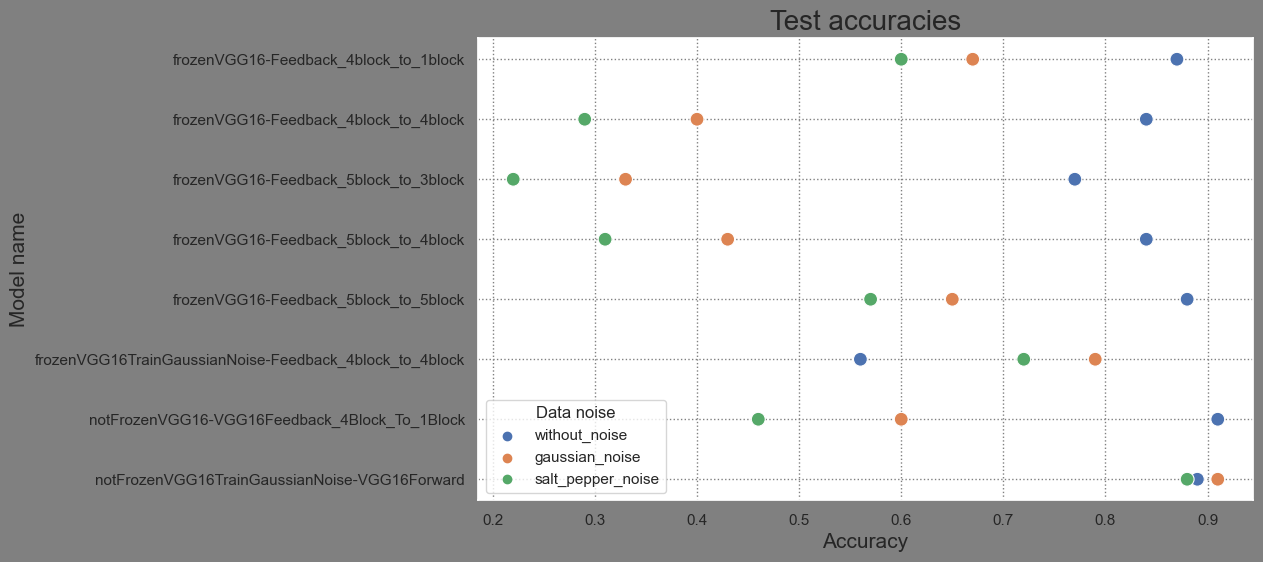

In [137]:
sns.set(rc={'axes.facecolor':'white',
            'figure.facecolor':'grey',
            "grid.color": "grey",
            "grid.linestyle": ":",
            "figure.figsize":(10,6),
            "axes.labelsize":15,
            "axes.titlesize":20})
fig, ax = plt.subplots()
sns.scatterplot(data=training_res, s=100, x="Accuracy", y="Model name", hue="Data noise")\
    .set(title='Test accuracies')